<a href="https://colab.research.google.com/github/pareshrchaudhary/numericalmethods/blob/main/LinearAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra

In [4]:
import numpy as np
import numpy.linalg as npl
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

In [5]:
InteractiveShell.ast_node_interactivity = "all"

## 1) System of Linear Equations

Solve $n$ linear equations in $n$ unknowns;

$\text{Equation 1⇒ }  2 \cdot x - y = 0$   
$\text{Equation 2⇒ }  -x + 2 \cdot y = 3$  

High level matrix view -
$\begin{aligned}
    \begin{bmatrix}
        2 & -1 \\
        -1 & 2
    \end{bmatrix}
    \begin{bmatrix}
        x \\
        y
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0 \\
        3
    \end{bmatrix}
\end{aligned}$

### 1.1) Row Picture-

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Graphs of Equations')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

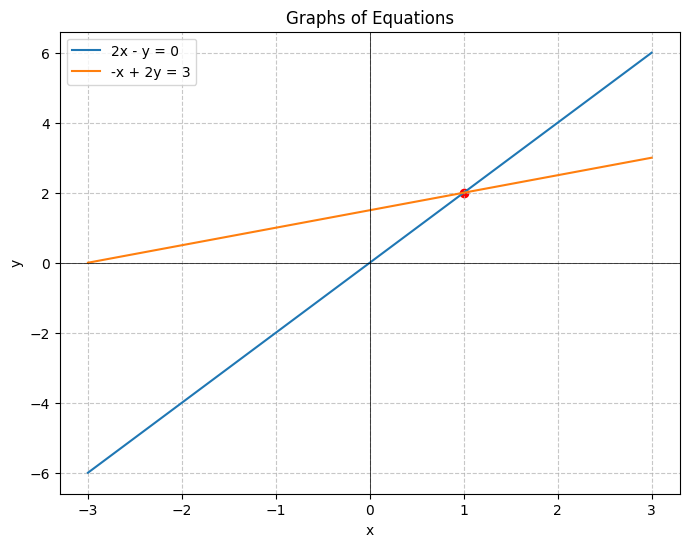

In [45]:
x_values = np.arange(-3, 4)
y1 = lambda x: 2 * x
y2 = lambda x: (3 + x) / 2
y1_values = [y1(x) for x in x_values]
y2_values = [y2(x) for x in x_values]

plt.figure(figsize=(8, 6))
plt.plot(x_values, y1_values, label='2x - y = 0')
plt.plot(x_values, y2_values, label='-x + 2y = 3')
plt.scatter(1, 2, color='red')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Graphs of Equations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

``
 For x = 1 -> Eq 1 = 2, Eq 2 = 2
``  
The intersection represents the solution to the system of equations.  
Solution: $x = 1$, $y = 2$.

Cross check -   
$\text{Equation 1⇒ }  2 \cdot (1) - (2) = 0$   
$\text{Equation 2⇒ }  -(1) + 2 \cdot (2) = 3$  

### 1.2) Column Picture

Coefficient expressed as vectors.

Column view -
$\begin{aligned}
    x \begin{bmatrix}
        2 \\
        -1
    \end{bmatrix}
    + y \begin{bmatrix}
        -1 \\
        2
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0 \\
        3
    \end{bmatrix}
\end{aligned}$

In [46]:
vectorA = np.array([2, -1])
vectorB = np.array([-1, 2])

We have solution from row picture $x = 1$ and $y = 2$

In [47]:
scalerA = 1
scalerB = 2

In [54]:
scaleA = scalerA * vectorA  # Scaling vector A by 1
scaleB = scalerB * vectorB  # Scaling vector B by 2
scaleA , scaleB

(array([ 2, -1]), array([-2,  4]))

In [55]:
linear_combination = scaleA + scaleB  # Linear combination of A & B
linear_combination

array([0, 3])

<Figure size 800x600 with 0 Axes>

(-3.0, 3.0)

(-3.0, 5.0)

Text(0.5, 1.0, 'Vectors and Linear Combination')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

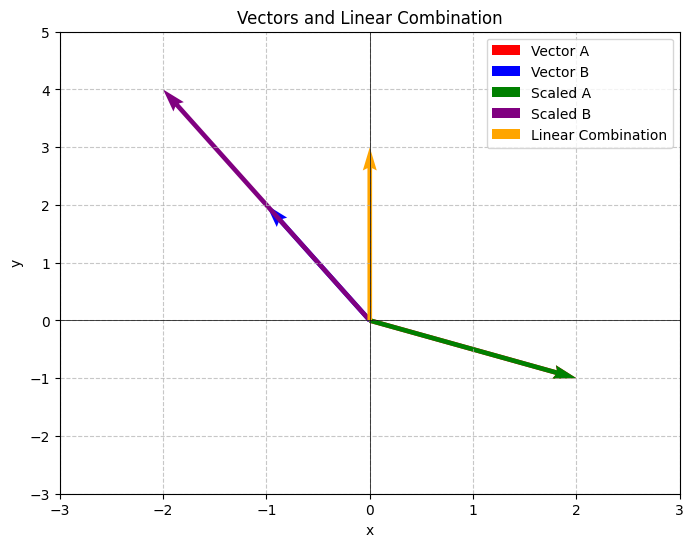

In [59]:
plt.figure(figsize=(8, 6))
plt.quiver(0, 0, vectorA[0], vectorA[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector A')
plt.quiver(0, 0, vectorB[0], vectorB[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector B')
plt.quiver(0, 0, scaleA[0], scaleA[1], angles='xy', scale_units='xy', scale=1, color='green', label='Scaled A')
plt.quiver(0, 0, scaleB[0], scaleB[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Scaled B')
plt.quiver(0, 0, linear_combination[0], linear_combination[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Linear Combination')

plt.xlim(-3, 3)
plt.ylim(-3, 5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Vectors and Linear Combination')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Given two vectors $c$ and $d$ and scalars $x$ and $y$, the sum $xc + yd$ is called a linear combination of $c$ and $d$.

$\begin{aligned}
  \text{Geometrically, we want } (x) \text{ and }  (y) \text{ such that }
  (x) \text{ copies of}
  \begin{bmatrix}
    2 \\
    -1
  \end{bmatrix}
  \text{ added to } (y) \text{ copies of }
    \begin{bmatrix}
    -1 \\
    2
  \end{bmatrix}
  \text{ equals the vector}
  \begin{bmatrix}
  0 \\
  3
  \end{bmatrix}
\end{aligned}$

### 1.3) Matrix Picture

#### Notation

Coefficients expressed as matrix and unknowns as vectors.

Matrix view -
$\begin{aligned}
    \begin{bmatrix}
        2 & -1 \\
        -1 & 2
    \end{bmatrix}
    \begin{bmatrix}
        x \\
        y
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0 \\
        3
    \end{bmatrix}
    \\
    A & x  = b
\end{aligned}$  

$A \in \mathbb{R}^{m*n} \text{ a matrix with } m \text{ rows and } n \text{ columns}$

$x \in \mathbb{R}^{n} \text{ a vector with } n \text{ entries}$

By convention, an n-dimensional vector is often thought of as a matrix with $(n) rows$ and $(1) column$, known as a **column vector**.

In [10]:
matA = np.array([[2,-1], [-1,2]])
matA

array([[ 2, -1],
       [-1,  2]])

In [11]:
vec_b = np.array([0, 3])
vec_b

array([0, 3])

Properties of numpy array

In [12]:
print(f"Number of dimensions = {matA.ndim}")
print(f"(rows, columns) = {matA.shape}")
print(f"Total number of elements  = {matA.size}")
print(f"Data type of the elements = {matA.dtype}")
print(f"Size in bytes of each element = {matA.itemsize}")

Number of dimensions = 2
(rows, columns) = (2, 2)
Total number of elements  = 4
Data type of the elements = int64
Size in bytes of each element = 8


#### Indexing

$i^{th}$ element of $x$ is $x_i$, similarly, elements of $A$ are accessed by $a_{ij}$

$Row = i$,  $Column = j$

In [13]:
matA[1,0]  # indexing starts from 0

-1

In [14]:
vec_b[0]

0

#### Solving $Ax = b$

In [15]:
vectorX = np.linalg.solve(matA, vec_b)
vectorX

array([1., 2.])

In general, for a real-valued system of linear equations we obtain **either no, exactly one, or infinitely many solutions**.

## 2) Matrix Operations

### 2.1) Matrix Transpose

$(A^T)_{ij} = A_{ji}$

$\begin{aligned}
    x =
    \begin{bmatrix}
        1 & 2 \\
        3 & 4
    \end{bmatrix}
    x^T =
    \begin{bmatrix}
        1 & 3 \\
        2 & 4
    \end{bmatrix}
\end{aligned}$



In [16]:
vecX = np.array([[1,2], [3,4]])

In [17]:
vecX.T

array([[1, 3],
       [2, 4]])

### 2.2) Matrix Addition

Sum of two matrices is defined element wise.

$\begin{aligned}
    \begin{bmatrix}
        2 & 5 \\
        1 & 3
    \end{bmatrix}
    +
    \begin{bmatrix}
        2 & 5 \\
        1 & 3
    \end{bmatrix}
    =
    \begin{bmatrix}
        2+2 & 5+5 \\
        1+1 & 3+3
    \end{bmatrix}
\end{aligned}$

In [18]:
matA = np.array([[2,5], [1,3]])
matB = np.array([[2,5], [1,3]])

In [19]:
matA + matB

array([[ 4, 10],
       [ 2,  6]])

**Addition Properties**:  
$\text{Commutative} ⇒ A+B = B+A$  
$\text{Distributive} ⇒ c(A + B) = cA + cB$  
$\text{Associative} ⇒ (A+B)+C = A+(B+C)$  

### 2.3) Matrix multiplication

The product of two matrices $A \in \mathbb{R}^{m \times b}$ and $B \in \mathbb{R}^{n \times p}$ is the matrix $C = AB \in \mathbb{R}^{m \times p}$ where $\boxed{C_{ij} = \sum\limits_{k=1}^n A_{ik} B_{kj}}$

Multiplication $(m \times p)$ to exist $(m \times n) (n \times p)$ inner dimension must match.

The number of columns in $A$ must equal the number of rows in $B$.

#### 1) Scalar Multiplication

$\begin{aligned}
    c \cdot x =
    \begin{bmatrix}
        c \cdot 1 & c \cdot 2 \\
        c \cdot 3 & c \cdot 4
    \end{bmatrix}
\end{aligned}$

In [20]:
vecX =  np.array([1,2])

In [21]:
vecX*2

array([2, 4])

#### 2) Vector-Vector Product

_Also called inner product or dot product of vectors._

$x^T \cdot y = \sum\limits_{k=1}^n x_{i} y_{i}$

$\boxed{\begin{aligned}
    x^T \cdot y =
    \begin{bmatrix}
        a & b
    \end{bmatrix}
    \begin{bmatrix}
        c \\
        d
    \end{bmatrix}
    =
    \begin{bmatrix}
        a \cdot c \\
        b \cdot d
    \end{bmatrix}
\end{aligned}}$

$x^T \cdot y = y^T \cdot x$

$\boxed{\begin{aligned}
    y^T \cdot x =
    \begin{bmatrix}
        c & d
    \end{bmatrix}
    \begin{bmatrix}
        a \\
        b
    \end{bmatrix}
    =
    \begin{bmatrix}
        c \cdot a \\
        b \cdot b
    \end{bmatrix}
\end{aligned}}$

In [22]:
vecX = np.array([1,2])
vecY = np.array([2,1])
vecX.shape, vecY.shape

((2,), (2,))

In [23]:
result = 0
for i in range(0, len(vecX)):
  result += vecX[i]*vecY[i]
result

4

In [24]:
np.dot(vecX,vecY)  # numpy . operator

4

#### 3) Matrix-Vector Product

_Linear combination of columns of matrix_

$y = Ax$, where $y$ is a linear combination of the columns of $A$.

$y^T = x^TA$, where $y$ is a linear combination of the rows of $A$.

In [25]:
matA = np.array([[2,5], [1,3]])
vecX =  np.array([1,2])

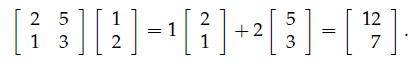

In [26]:
def linear(mat, vec):
  result = np.zeros(mat.shape[1])
  for col in range(mat.shape[1]):
    col_vector = mat[:, col]
    scaled_vector = vec[col] * col_vector
    result += scaled_vector
  return result

In [27]:
linear(matA, vecX)

array([12.,  7.])

In [28]:
np.matmul(matA, vecX)

array([12,  7])

In [29]:
np.matmul(vecX.T, matA)

array([ 4, 11])

#### 4) Matrix-Matrix Product

_Dot product._

$\boxed{\begin{aligned}
    A \cdot B =
    \begin{bmatrix}
        1 & 2 \\
        3 & 4
    \end{bmatrix}
    \begin{bmatrix}
        4 & 3 \\
        2 & 1
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 \cdot 4 + 2 \cdot 2 & 1 \cdot 3 + 2 \cdot 1\\
        3 \cdot 4 + 4 \cdot 2 & 3 \cdot 3 + 4 \cdot 1\\
    \end{bmatrix}
\end{aligned}}$

In [30]:
A = np.array([[1,2], [3,4]])
B = np.array([[4,3], [2,1]])

In [31]:
A.dot(B)  # np.dot

array([[ 8,  5],
       [20, 13]])

In [32]:
A @ B  # @ operator

array([[ 8,  5],
       [20, 13]])

In [33]:
np.matmul(A, B)  # np.matmul

array([[ 8,  5],
       [20, 13]])

**Multiplication Properties**:  
$\text{Not Commutative} ⇒ AB \ne BA$  
$\text{Associative} ⇒ (AB)C = A(BC)$  
$\text{Distributive} ⇒ A(B + C ) = AB + BC$  

In [34]:
A = np.array([[0,0], [1,0]])
B = np.array([[0,0], [0,1]])

$\boxed{\begin{aligned}
    A \cdot B =
    \begin{bmatrix}
        0 & 0 \\
        1 & 0
    \end{bmatrix}
    \begin{bmatrix}
        0 & 0 \\
        0 & 1
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 + 0 & 0 + 0\\
        0 + 0 & 0 + 0\\
    \end{bmatrix}
\end{aligned}}$

$\boxed{\begin{aligned}
    B \cdot A =
    \begin{bmatrix}
        0 & 0 \\
        0 & 1
    \end{bmatrix}
    \begin{bmatrix}
        0 & 0 \\
        1 & 0
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 + 0 & 0 + 0\\
        0 + 1 & 0 + 0\\
    \end{bmatrix}
\end{aligned}}$

In [35]:
A @ B == B @ A

array([[ True,  True],
       [False,  True]])

### Matrix Inverse

If there is a square matrix $A$ then it may or may not have it's inverse.

1.   If it does

> $A^{-1} A = I = AA^{-1}$  
> $A$ is invertible or non-singular.

2.   If it does not

> $det(A) = 0$ and we can find non-zero vector $x$ such that $Ax = 0$.  
> $A$ is singular





In [36]:
matrix = np.array([[2, 1, 0],
                   [1, 3, 1],
                   [0, 1, 2]])

try:
  inverse_matrix = np.linalg.inv(matrix)
  print("Inverse Matrix:")
  print(inverse_matrix)
except np.linalg.LinAlgError:
  print("Matrix is singular and does not have an inverse.")

Inverse Matrix:
[[ 0.625 -0.25   0.125]
 [-0.25   0.5   -0.25 ]
 [ 0.125 -0.25   0.625]]


Inverse of transpose

$(A^{-1})^T = (A^T)^{-1}$

Inverse of product

$(AB) (B^{-1}A^{-1}) = I = (B^{-1}A^{-1})(AB)$

## Vector Spaces